## Load Modules

This notebook is a reference that goes along with a quick tutorial on selected classification algorithms that I gave at Insight Data Science. It's by no means exhaustive and doesn't cover all possible classification methods. The notebook is not intended to explain the methodology behind each of the algorithms used (that's for the rest of the tutorial) but you can read about them 

The goal here is to use the public UCI Wisconsin Breast Cancer dataset to develop a model that can classify cancerous breast tumour as benign or malignant. As we'll see, this dataset isn't actually all that great for highlighting the strengths and weaknesses of ML algorithms, because the data segragate quite cleanly into two classes. Our predictive capability on the test set (which was excluded from the training) is above 90% or so regardless of the algorithm or the degree of overfitting. A more difficult classification problem, where the two distinct classes are more difficult to distinguish from each other, would be more instructive, but we'll work with what we have


In [1]:
#math
import numpy as np
import pandas as pd
import math
import missingno as msno

#plotting
import matplotlib.pyplot as plt
#%matplotlib inline

#machine learning tools
from sklearn.model_selection import train_test_split #t
from sklearn.neighbors import KNeighborsClassifier #knn classifier model
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest


## My Functions Here

I like to place my functions at the top or bottom of the code, rather than inline, so they're easy to find. This one just rounds a number to a set number of significant figures, rather than a set number of decimals. This is useful when dealing with logarithmically distributed data

In [2]:
#Short functions
def round_sigfigs(num, sig_figs):
    'Round to specified number of sigfigs'
    if num != 0:
        return round(num, -int(math.floor(math.log10(abs(num))) - (sig_figs - 1)))
    else:
        return 0  # Can't take the log of 0


## Load Data - Wisconsin Breast Cancer




In [3]:
#It's a CSV despite the weird extension. Column names from .names
colNames = ['ID', 'Thick', 'UniSize', 'UniShape', 'Adhesion', 
        'Size', 'Nuclei', 'Chromatin', 'NormNuc', 'Mitosis', 'Class'];
#missing values are '?', annoyingly
cancer = pd.read_csv('./breast-cancer-wisconsin.data', header=None, 
                     names=colNames,na_values=['?']) 

In [4]:
#Let's have a look
cancer.head()

,ID,Thick,UniSize,UniShape,Adhesion,Size,Nuclei,Chromatin,NormNuc,Mitosis,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
cancer.shape

(699, 11)

In [6]:
cancer.describe()

,ID,Thick,UniSize,UniShape,Adhesion,Size,Nuclei,Chromatin,NormNuc,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Find and remove any missing values

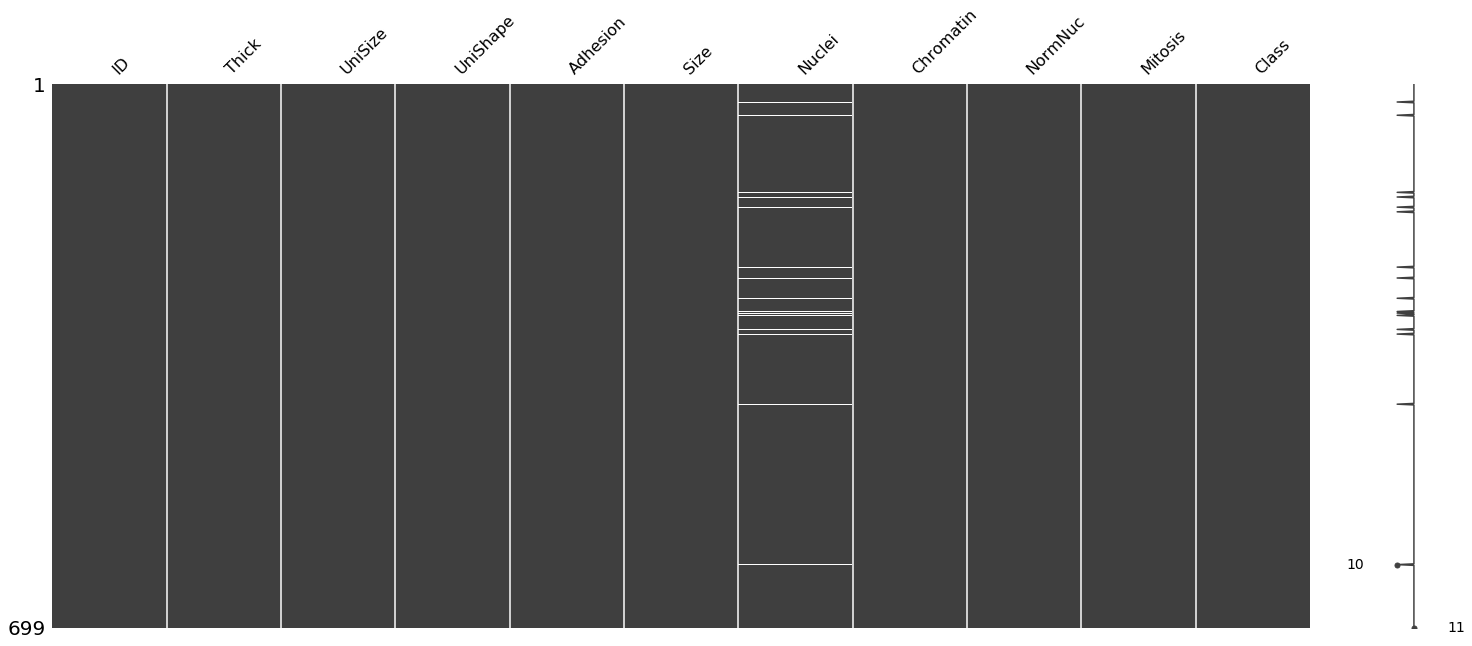

In [7]:
#are there any NaNs?
msno.matrix(cancer)

In [8]:
#Look at the Bad Rows more carefully
dfBad = cancer[cancer.isnull().any(axis=1)]
print(dfBad)
print(dfBad.shape)

          ID  Thick  UniSize  UniShape  Adhesion  Size  Nuclei  Chromatin  \
23   1057013      8        4         5         1     2     NaN          7   
40   1096800      6        6         6         9     6     NaN          7   
139  1183246      1        1         1         1     1     NaN          2   
145  1184840      1        1         3         1     2     NaN          2   
158  1193683      1        1         2         1     3     NaN          1   
164  1197510      5        1         1         1     2     NaN          3   
235  1241232      3        1         4         1     2     NaN          3   
249   169356      3        1         1         1     2     NaN          3   
275   432809      3        1         3         1     2     NaN          2   
292   563649      8        8         8         1     2     NaN          6   
294   606140      1        1         1         1     2     NaN          2   
297    61634      5        4         3         1     2     NaN          2   

In [ ]:
#there are only a few. Let's lose 'em
cancer.dropna(inplace=True)

## Make new dataframes with Features (X) and Labels (y)

In [ ]:
#pull out the features and labels
X = cancer.drop(columns=['ID', 'Class'])
y = cancer['Class']

## Have a Quick Look

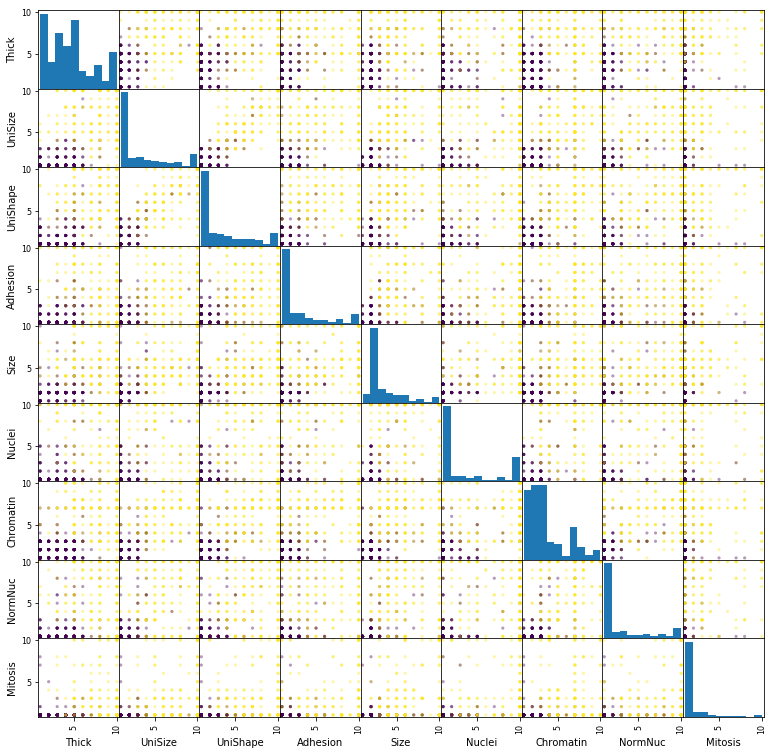

In [ ]:
#make a scatter plots of all possible combinations
pd.plotting.scatter_matrix(X,c=y,s=10,figsize=(13,13),marker='o',alpha=0.4);
#yellow = benign; purple = malignant

In [ ]:
#get some basic stats

print('Number of samples: ' + str(len(X)))
print('Number of features: ' + str(len(X.T)))
print('\n Label = 2: Benign')
print(' Label = 4: Malignant\n')
print(y.value_counts())


Number of samples: 683
Number of features: 9

 Label = 2: Benign
 Label = 4: Malignant

2    444
4    239
Name: Class, dtype: int64


## k-nearest-neighbour algorithm

This will be our first classification algorithm. KNN is probably the simplest way to classify. Each new data point is assigned the class of the k nearest datapoints from the training set. We'll start by using three nearest neighbours

In [ ]:
#split the data into training and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,stratify=y)
print([Xtrain.shape, ytrain.shape])
print([Xtest.shape, ytest.shape])

#Instantiate and train the model. Initial guess, 3 neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,ytrain) #train using the training set!

#make predictions on our test set
ypredict = knn.predict(Xtest)
#and check accuracy
accurate = np.mean(ypredict==ytest)

#display
print('Accuracy with k=3 is ' + str(round(accurate,3)))

[(512, 9), (512,)]
[(171, 9), (171,)]
Accuracy with k=3 is 0.977


That accuracy is pretty good! But let's see what happens when we vary the number of neighbours

In [ ]:
#split the data into training and test
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, random_state=0)

#set up the loop and initialize
ks = range(1,len(Xtrain)) #the k's we want to test
trainAccu = [None] * len(ks) #initialize: accuracy for training set
testAccu = [None] * len(ks) #initialize: accuracy for test set

#run the loop
for k in ks:
    
#    print('k = ' + str(k))
    #Instantiate and train the model. k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,ytrain)
    
    #make predictions on test set
    ypredict = knn.predict(Xtest)
    #check accuracy of test set predictions
    testAccu[k-1] = np.mean(ypredict==ytest)
    
    #let's do same for the training set
    #This is bad (!) in practice but instructive here
    ypredict = knn.predict(Xtrain)
    trainAccu[k-1] = np.mean(ypredict==ytrain)


In [ ]:
#do the plotting for the above cell
fig,ax = plt.subplots(1,2,figsize=(8,4))

#first subplot: only the first few ks
plt.sca(ax[0])
imax=11
plt.plot(ks[:imax],testAccu[:imax],'-',label='Test Set')
plt.plot(ks[:imax],trainAccu[:imax],'-',label='Training Set')
plt.ylabel('Accuracy')
plt.xlabel('k: Number of Neighbours')
plt.legend()
plt.ylim([0.90, 1.01])

#second subplot: all the ks
plt.sca(ax[1])
plt.plot(ks,testAccu,'-',label='Test Set')
plt.plot(ks,trainAccu,'-',label='Training Set')
plt.xlabel('k: Number of Neighbours')
plt.legend()
plt.ylim([0.60, 1.01])

Note that fewer neighbours (i.e. smaller k) is overfitting and more neighbours (larger k) is underfitting. When k=1, the prediction for the training set gives 100% accuracy, which is exactly what we'd expect. Even the test set has good accuracy, with the best accuracy at 3 to 5 neighbours. You can see that when we start using more than 50 or so neighbours we start to overfit dramatically. Asymptotically, when k approaches the same size as the training dataset, we perform the same as random chance (which also makes sense!)

## Logistic Regression

Logistic regression is another type of classification. This tries to draw a hyperplane through the dataset to separate the data into two regions (classes). 


In [ ]:
#try a logistic regression for comparison

#split the data into training and test
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, random_state=0)

#instantiate and run the model. Start with default C=1 (amount of fitting)
#C is the inverse of the regularization strength
model = LogisticRegression(C=1,solver='liblinear')
model.fit(Xtrain, ytrain);
#make prediction on test set
ypredict = model.predict(Xtest);
print('Accuracy: ' + str(round(np.mean(ypredict==ytest),3)))


The variable C can be interpreted as how strongly you fit the model to the data. High C results in more fitting, lower C in less fitting. More rigorously, it's the inverse of the regularization strength. Let's see what happens when we vary this

In [ ]:
#logistic regression, with variable C

#split the data into training and test
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, random_state=0)

#setup number of Cs to check, and initialize accuracy arrays
Cs = 10**np.arange(-2,5.25,0.25)
testAccu = [None] * len(Cs)
trainAccu = [None] * len(Cs)

#do the loop over fitting parameters
for ii, C in enumerate(Cs):
    
#    print('C = ' + str(round_sigfigs(C,3)))
    
    #instantiate and run the model
    model = LogisticRegression(C=C,solver='liblinear')
    model.fit(Xtrain, ytrain);
    
    #make prediction on test set and calculate accuracy
    ypredict = model.predict(Xtest);
    testAccu[ii] = np.mean(ypredict==ytest)
    
    #do the same for the training set, to see what happens...
    ypredict = model.predict(Xtrain);
    trainAccu[ii] = np.mean(ypredict==ytrain)


In [ ]:
#do the plotting for the above cell

fig, ax = plt.subplots()
plt.plot(Cs,testAccu,label='Test Set')
plt.plot(Cs,trainAccu,label='Training Set')
plt.xscale('log')
plt.legend(loc=4)
plt.ylim([0.9,1])
plt.grid(True)
plt.xlabel('C: inverse of regularization (i.e. how much fitting)')



## Decision Tree

Decision trees and random forests are another form of classification. Decision trees are the building blocks on which random forest models are built, so we'll start with a single decision tree and then build up to a more complex random forest model. 

First, we'll try an unpruned decision. I.e. we're going to let the algorithm choose how many levels to include in the tree. This will definitely overfit the data, but we'll do it anyway and see what we can learn from the problem

In [ ]:
#split the data into training and test
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, random_state=15)

#instantiate and run
model = DecisionTreeClassifier()
model.fit(Xtrain,ytrain)

#fit to training and test sets
ypredict = model.predict(Xtrain)
print('Training Set Accuracy: ' + str(round(np.mean(ypredict==ytrain),3)))
ypredict = model.predict(Xtest)
print('Test Set Accuracy: ' + str(round(np.mean(ypredict==ytest),3)))
print('Max Depth of Tree: ' + str(model.tree_.max_depth))


To no one's surprise, the accuracy when making predictions on the training set is 100%. That is because the model is currently perfectly fit, and definitely overfit. Notice that, even though the accuracy for the test set is objectively high (92%), it's quite a bit lower than the previous methods we used.

Next, let's see what happens when we limit the depth of the tree

In [ ]:
# %% okay let's see what happens when we vary the depth of the tree
depths = np.arange(1,10)
testAccu = [None] * len(depths)
trainAccu= [None] * len(depths)

#do the loop
for ii, maxDepth in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
    model.fit(Xtrain,ytrain)
    #prediction on the training set
    ypredict = model.predict(Xtrain)
    trainAccu[ii] = np.mean(ypredict==ytrain)
    #prediction on the test set
    ypredict = model.predict(Xtest)
    testAccu[ii] = np.mean(ypredict==ytest)

#do the plotting
fig, ax = plt.subplots()
plt.plot(depths,testAccu,label='Test Set')
plt.plot(depths,trainAccu,label='Training Set')
plt.legend(loc=2)
plt.ylim([0.91,1.01])
plt.grid(True)
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')


This is a pretty classic accuracy plot. As we increase the complexity of the model (i.e. the depth of the tree) we go from an underfit model (depth=1), to an optimized model (depth=4), to a definitely overfit model (depth>4). 

We can now look and see which features were most important to the decision tree:

In [ ]:
# %% looks like 4 layers is optimal. Check feature importance now
model = DecisionTreeClassifier(max_depth=4, random_state=2)
model.fit(Xtrain,ytrain)
#make a bar graph
fig,ax = plt.subplots();
plt.barh(range(X.shape[1]), model.feature_importances_);
plt.yticks(np.arange(X.shape[1]), X.columns);

## Random Forest

The above approach is good, but now let's turn the tree into a forest. This should add some nuance to our model and improve its performance. We'll vary the number of trees and go up to 100.

In [ ]:
trees = range(1,101);
testAccu = [None] * len(trees)
#let's see how we perform as we vary the size of the forest
for ii in trees:
    model = RandomForestClassifier(n_estimators = ii, random_state=0)
    model.fit(Xtrain,ytrain)
    #prediction on test set
    ypredict = model.predict(Xtest)
    testAccu[ii-1] = np.mean(ypredict==ytest)

#plot
fig, ax = plt.subplots()
plt.plot(trees, testAccu)
plt.xlabel('Number of Trees in the Random Forest')
plt.ylabel('Accuracy')


In the above plot we can see how the accuracy increases from 92% to 97% as the the number of trees in the forest increases. However, there are diminishing returns as you add more trees. In this example, there's no point in adding more than 40 trees

In [ ]:
#And make a bar graph of the feature importances
fig,ax = plt.subplots();
plt.barh(range(X.shape[1]), model.feature_importances_);
plt.yticks(np.arange(X.shape[1]), X.columns);

Notice that a random forest distributes the weight among the variables more evenly, relying less heavily on a single determinant feature